# Obligatorisk innlevering 1- oppgave 1

Denne oppgaven tar for seg et datasett der din oppgave er å forutsi prisen på huset basert på en rekke variabler som beskriver husets fasiliteter, størrelse osv.

In [3]:
# Importer resten av pakkene du trenger her:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score
from sklearn.model_selection import GridSearchCV, KFold


In [4]:
# I denne oppgaven skal dere bruke følgende datasett:
df = pd.read_csv("./datasett1.csv")
# Her deler jeg datasettet inn i egenskaper (X) og target (y)
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
# Tilslutt deler jeg inn i et trening- og et testsett (75%/25%)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)
# PS: Ikke endre denne kodecellen!

#### Oppgave 1.1)
Visualiser $y\_train$ og $y\_val$ i et histogram. Kan du, basert på figuren, se hva slags problem vi skal løse (regresjon/klassifisering)?

Begrunn svaret

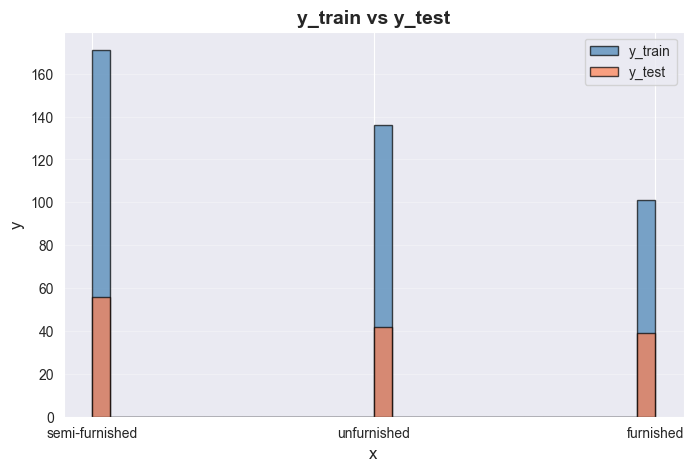

In [5]:
#TODO: visualiser y_train og y_test i et Histogram

#Lager Historgramet
plt.figure(figsize=(8, 5))

#Histogram for y_train
plt.hist(y_train, bins=30, color='steelblue', alpha=0.7, label='y_train', edgecolor='black')

#Histogram for y_test
plt.hist(y_test, bins=30, color='coral', alpha=0.7, label='y_test', edgecolor='black')

plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)

plt.title('y_train vs y_test', fontsize=14, fontweight='bold')

plt.grid(axis='y', alpha=0.3)

plt.legend()
plt.show()

**Svar:**

*Når vi ser på fordelingen ifra y_train og y_test ser vi at vi skal løse et regresjonsproblem fordi Prisen i datasettet varier over et stort beløp, Man kunne trod at dette var et Klassifiserings problem på grunn av Semi-fournished,unfurnished og furnished men disse kategoriene er avhengig av en input verdi og er ikke selvstedige. hvis vi skulle løse dette innenfor en Klassifisering problem så kan ikke pris varierer så mye det må være innenfor en kategorisk variabel som lav,middels,høy*

#### Oppgave 1.2)

fullfør funksjonen under slik at den tar inn både egenskapene (input-varaibler) og target, legger disse sammen i samme matrise igjen og visualiser dataene som en korrelasjonsmatrise (poenget er at du skal kunne se hvordan egenskapene korrelerer med target). '

* Tips: noen av variablene er kategoriske og kodet som tekst disse må konverteres til numeriske variabler for å inkluderes i korrelasjonsplottet.

* Beskriv hvilke egenskaper du ser korrelerer mest med target

In [6]:
def korrelasjonsmatrise(X, y):
    X_temp = X.copy()
    y_temp = y.copy()
    X_temp["Target"] = y_temp

    # Konverter kategoriske variabler til numeriske
    X_num = pd.get_dummies(X_temp)

    # Beregn korrelasjonsmatrise
    corr = X_num.corr()

    # Plot korrelasjonsmatrisen
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title("Korrelasjonsmatrise mellom features og target (pris)", fontsize=14)
    plt.show()

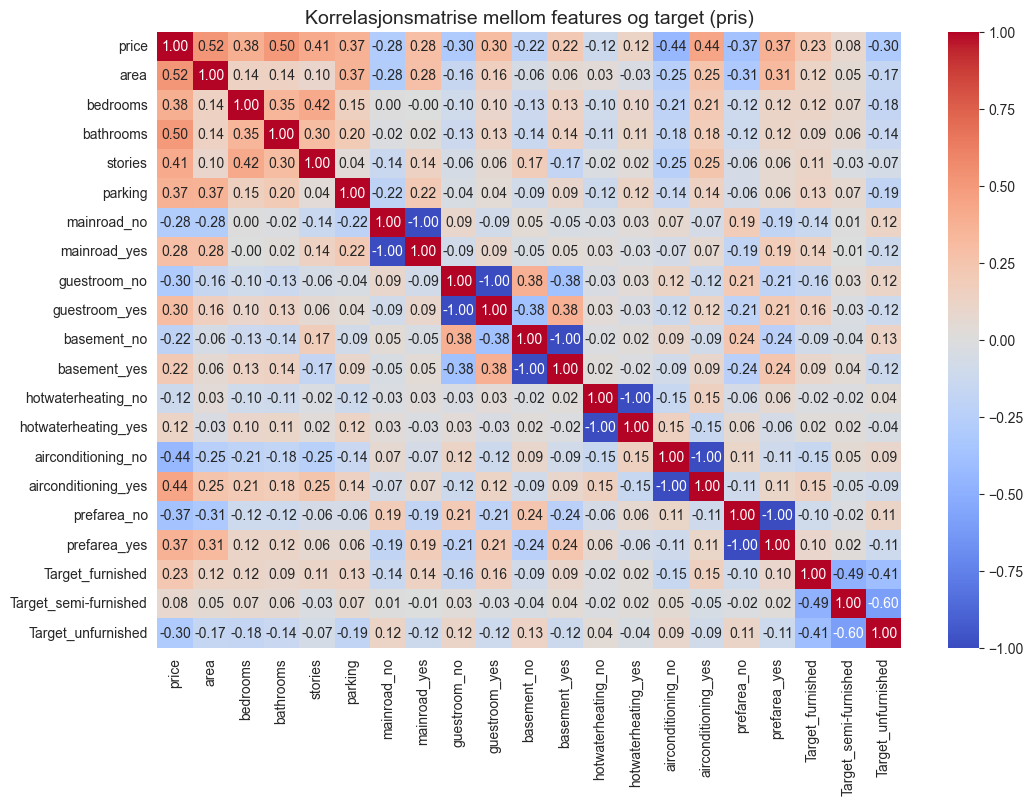

In [7]:
korrelasjonsmatrise(X_train,y_train)

**Svar:**

Basert på Korrelasjonsmatrisen ser jeg at følgende egenskaper korrelerer mest med target som er Pris, Pris forandrer seg fra furnished -> unfurnished som indikerer at prisen på noe går opp og ned i pris vis det er Furnished,semi-furnished og unfurnished"



#### Oppgave 1.3) 
Velg en modellarkitektur (gjerne fra Scikit-Learn) og gjør et strukturert hyperparametersøk. 
* Gjør et søk på minst 3 paramtere og minst 2 verdier pr parameter
* Bruk 3-folds kryssvalidering for hver parameterkombinasjon
* Velg en metrikk som passer for målet 
* Skriv ut den parameterkobinasjonen som ga den beste skåren, samt skåren. Kommenter resultatet

In [11]:

y = df['price']
X = df.drop('price', axis=1)

#enkoder ja nei koloner til 0/1 så Randomforestreegressor kan fungere
yes_no_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
X[yes_no_cols] = X[yes_no_cols].apply(lambda col: col.map({'yes': 1, 'no': 0}))

X = pd.get_dummies(X, columns=['furnishingstatus'], drop_first=True)

modell = RandomForestRegressor(random_state=42)

param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [5, 10, 15],
    "min_samples_split": [2, 5, 10]
}

cv = KFold(n_splits=min(3, len(X)), shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=modell,
    param_grid=param_grid,
    cv=cv,
    scoring="r2",
    verbose=1
)

grid_search.fit(X, y)

# Print resultatet
print("Beste parametre:", grid_search.best_params_)
print("Beste kryss-valideringsskår:", grid_search.best_score_)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Beste parametre: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Beste kryss-valideringsskår: 0.6339846845940855


**Svar:**

*< Randomforest fungerer fint for dette datasettet men det er noe rom for forbedringer, eks R^2 = 1 er perfekt prediksjon vi fikk R^2 = 0.63 som betyr at modellen forklarer ca 63% av variasjonen i prisen på tvers av 3-folds kryssvalidering men det er forsatt en 36% variasjon som ikke forklares. Kansje vis det ble bruke 5-folds kryssvalidering så ville validerinsskår vært høyere>*

#### Oppgave 1.4) 
Bruk hyperparameterkombinasjonen fra oppgave 1.3 og kryssvalider den modellen på nytt med K >= 5 
* Logg "mean absolute error" og "mean squared error" for hver kryssvalideringsrunde
* Oppgi gjennomsnitt og standardavvik for "mean absolute error" og "mean squared error" etter kryssvalideringen og kommenter resultatet
* Hvor stor er den gjennomsnittlige feilen på prediksjonen sammenlignet med gjennomsnittlig faktisk pris i treningsdataene? 

In [12]:
#TODO: Utfør kryssvalidering med de optimale parameterene fra forrige oppgave og logg mean_absolute_error og mean_squared_error

categorical_cols = X.select_dtypes(include=['object']).columns
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

best_params = grid_search.best_params_

n_splits = min(5, len(X_encoded))
cv = KFold(n_splits=n_splits, shuffle=True, random_state=42)

mae_scores = []
mse_scores = []

for fold, (train_idx, val_idx) in enumerate(cv.split(X_encoded, y), 1):
    X_train_cv, X_val_cv = X_encoded.iloc[train_idx], X_encoded.iloc[val_idx]
    y_train_cv, y_val_cv = y.iloc[train_idx], y.iloc[val_idx]

    model = RandomForestRegressor(
        n_estimators=best_params['n_estimators'],
        max_depth=best_params['max_depth'],
        min_samples_split=best_params['min_samples_split'],
        random_state=42
    )
    model.fit(X_train_cv, y_train_cv)
    y_pred = model.predict(X_val_cv)

    mae = mean_absolute_error(y_val_cv, y_pred)
    mse = mean_squared_error(y_val_cv, y_pred)

    mae_scores.append(mae)
    mse_scores.append(mse)

    print(f"Fold {fold}: MAE={mae:.4f}, MSE={mse:.4f}")


Fold 1: MAE=1031481.8210, MSE=2003013175912.6565
Fold 2: MAE=852309.9065, MSE=1338953317213.6484
Fold 3: MAE=665283.5286, MSE=753845129140.4230
Fold 4: MAE=669625.3011, MSE=962241654285.9919
Fold 5: MAE=778743.2336, MSE=1226583849834.0012


In [13]:
#TODO: Beregn gjennomsnitt og standard avvik for mean_absolute_error og mean_squared_error og beregn hvor stor den 
# gjennomsnittlige feilen er i forhold til den gjennomsnittlige prisen for markedskampanjen (target) i prosent

n_splits = min(5, len(X_encoded))
cv = KFold(n_splits=n_splits, shuffle=True, random_state=42)

mae_scores = []
mse_scores = []

for train_idx, val_idx in cv.split(X_encoded, y):
    X_train_cv, X_val_cv = X_encoded.iloc[train_idx], X_encoded.iloc[val_idx]
    y_train_cv, y_val_cv = y.iloc[train_idx], y.iloc[val_idx]

    model = RandomForestRegressor(
        n_estimators=grid_search.best_params_['n_estimators'],
        max_depth=grid_search.best_params_['max_depth'],
        min_samples_split=grid_search.best_params_['min_samples_split'],
        random_state=42
    )
    model.fit(X_train_cv, y_train_cv)
    y_pred = model.predict(X_val_cv)

    mae_scores.append(mean_absolute_error(y_val_cv, y_pred))
    mse_scores.append(mean_squared_error(y_val_cv, y_pred))

# Beregn gjennomsnitt og standardavvik
mean_mae = np.mean(mae_scores)
std_mae = np.std(mae_scores)
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)

# Beregn MAE som prosent av gjennomsnittlig pris
mean_price = y.mean()
mae_percent = (mean_mae / mean_price) * 100

print(f"Gjennomsnittlig MAE: {mean_mae:.2f}, Standardavvik MAE: {std_mae:.2f}")
print(f"Gjennomsnittlig MSE: {mean_mse:.2f}, Standardavvik MSE: {std_mse:.2f}")
print(f"Gjennomsnittlig MAE i prosent av gjennomsnittlig pris: {mae_percent:.2f}%")


Gjennomsnittlig MAE: 799488.76, Standardavvik MAE: 135585.24
Gjennomsnittlig MSE: 1256927425277.34, Standardavvik MSE: 425258610055.31
Gjennomsnittlig MAE i prosent av gjennomsnittlig pris: 16.77%


**Svar:**
*<Vår Gjennomsnittlige MAE er på 800 823 kroner kort sagt betyr det at prediksjonene avviker med omtrent 800 000 kroner, Standardavvik MAE 137 085 kroner viser at feilen varierer mellom foldene men ikke for mye. MAE i % predikerer med en feil som tilsvarer 16,8% av den gjennomsnittlige prisen. >*

#### Oppgave 1.5) 
Tren modellen en siste gang på alle treningsdataene og gjør prediksjon på testdataene (bruk de optimale parametrene fra oppgave 1.3)
* Hvor stor er den gjennomsnittlige feilen på prediksjonen sammenlignet med gjennomsnittlig faktisk pris i testdataene? 

In [14]:
# Tren modellen på hele datasettet med de optimale hyperparametrene
final_model = RandomForestRegressor(
    n_estimators=grid_search.best_params_['n_estimators'],
    max_depth=grid_search.best_params_['max_depth'],
    min_samples_split=grid_search.best_params_['min_samples_split'],
    random_state=42
)

final_model.fit(X_encoded, y)

# Gjør prediksjon på hele datasettet
y_pred_all = final_model.predict(X_encoded)

# Beregn MAE og MSE
final_mae = mean_absolute_error(y, y_pred_all)
final_mse = mean_squared_error(y, y_pred_all)

# Beregn MAE som prosent av gjennomsnittlig pris
mean_price_all = y.mean()
final_mae_percent = (final_mae / mean_price_all) * 100

print(f"MAE på hele datasettet: {final_mae:.2f}")
print(f"MSE på hele datasettet: {final_mse:.2f}")
print(f"MAE i prosent av gjennomsnittlig pris: {final_mae_percent:.2f}%")


MAE på hele datasettet: 434145.47
MSE på hele datasettet: 367687951456.78
MAE i prosent av gjennomsnittlig pris: 9.11%


**Svar:**

*< Her er MAE på 433 773 mens i oppgave 1.4 så var det 800 823 ca 46% forskjell mellom de to, men i MAE i % av gjennomsnittlig pris så fikk vi i 1.5 9.1% og i 1.4 fikk vi 16,8% en forskjell på 7.7% som betyr at resultatet i 1.5 er mer nøyaktig en det vi fikk i 1.4>*